In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [4]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [7]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
from tensorflow import keras

In [10]:
from tensorflow.keras import layers as kl
from tensorflow.keras import activations

In [11]:
lll = [kl.Conv2D(32, kernel_size=(3, 3)), 
        kl.Activation(activations.relu)]

In [14]:
stem = keras.Sequential()
for ll in lll:
    stem.add(ll)

In [29]:
bodyl = [kl.MaxPooling2D(pool_size=(2, 2)),
kl.Conv2D(64, kernel_size=(3, 3), activation="relu"),
kl.MaxPooling2D(pool_size=(2, 2)),
kl.Flatten(),
kl.Dropout(0.5),
kl.Dense(num_classes, activation="softmax")]

In [31]:
body = keras.Sequential(bodyl)

In [26]:
x = inputs
x = stem(x)
x = body(x)

In [23]:
inputs = keras.Input(shape = (input_shape), name='input')


In [41]:
model = keras.Sequential([inputs, *lll,*bodyl])

In [42]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)            

In [43]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15


2022-03-13 14:07:28.658553: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201


422/422 [==============================] - 10s 4ms/step - loss: 0.3719 - accuracy: 0.8863 - val_loss: 0.0879 - val_accuracy: 0.9767
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1143 - accuracy: 0.9644 - val_loss: 0.0578 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0841 - accuracy: 0.9746 - val_loss: 0.0493 - val_accuracy: 0.9858
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0708 - accuracy: 0.9779 - val_loss: 0.0421 - val_accuracy: 0.9880
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0633 - accuracy: 0.9800 - val_loss: 0.0408 - val_accuracy: 0.9882
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0549 - accuracy: 0.9832 - val_loss: 0.0362 - val_accuracy: 0.9905
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0361 - val_accuracy: 0.9898
Epoch 8/15
422/4

In [89]:
from keras import layers
from keras import activations

# import relu, tanh, sigmoid, softmax, linear



    
def get_act_layer(name, *args, **kwargs):
    print(name)
    if name == "relu":
        return layers.Activation(activations.relu)
    elif name == "tanh":
        return layers.Activation(activations.tanh)
    elif name == "sigmoid":
        return layers.Activation(activations.sigmoid)
    elif name == "softmax":
        return layers.Activation(activations.softmax, **kwargs)
    elif name == "linear":
        return layers.Activation(activations.linear)
    elif name == "leaky":
        return layers.LeakyReLU(**kwargs)
    else:
        return "error"


In [90]:
kw = {"alpha":0.5}

In [94]:
name= "leaky"
act=get_act_layer(name)

leaky


In [95]:
act.__dict__

{'_self_setattr_tracking': True,
 '_instrumented_keras_api': True,
 '_instrumented_keras_layer_class': True,
 '_instrumented_keras_model_class': False,
 '_trainable': True,
 '_stateful': False,
 'built': False,
 '_input_spec': None,
 '_build_input_shape': None,
 '_saved_model_inputs_spec': None,
 '_saved_model_arg_spec': None,
 '_name': 'leaky_re_lu_7',
 '_activity_regularizer': None,
 '_trainable_weights': [],
 '_non_trainable_weights': [],
 '_updates': [],
 '_thread_local': <_thread._local at 0x7f90942c8d10>,
 '_callable_losses': [],
 '_losses': [],
 '_metrics': [],
 '_metrics_lock': <unlocked _thread.lock object at 0x7f9094342810>,
 '_dtype_policy': <Policy "float32">,
 '_compute_dtype_object': tf.float32,
 '_autocast': True,
 '_self_tracked_trackables': [],
 '_inbound_nodes_value': [],
 '_outbound_nodes_value': [],
 '_expects_training_arg': False,
 '_default_training_arg': None,
 '_expects_mask_arg': False,
 '_dynamic': False,
 '_initial_weights': None,
 '_auto_track_sub_layers': T

In [86]:
name= "softmax"
act=get_act_layer(name, -1)

softmax


In [111]:
for a in range(9,3,-1):
    print(a)

9
8
7
6
5
4


In [113]:
np.ceil(np.log2(3))

2.0

In [87]:
act.__dict__

{'_self_setattr_tracking': True,
 '_instrumented_keras_api': True,
 '_instrumented_keras_layer_class': True,
 '_instrumented_keras_model_class': False,
 '_trainable': True,
 '_stateful': False,
 'built': False,
 '_input_spec': None,
 '_build_input_shape': None,
 '_saved_model_inputs_spec': None,
 '_saved_model_arg_spec': None,
 '_name': 'activation_4',
 '_activity_regularizer': None,
 '_trainable_weights': [],
 '_non_trainable_weights': [],
 '_updates': [],
 '_thread_local': <_thread._local at 0x7f909447dbd0>,
 '_callable_losses': [],
 '_losses': [],
 '_metrics': [],
 '_metrics_lock': <unlocked _thread.lock object at 0x7f9094348e10>,
 '_dtype_policy': <Policy "float32">,
 '_compute_dtype_object': tf.float32,
 '_autocast': True,
 '_self_tracked_trackables': [],
 '_inbound_nodes_value': [],
 '_outbound_nodes_value': [],
 '_expects_training_arg': False,
 '_default_training_arg': None,
 '_expects_mask_arg': False,
 '_dynamic': False,
 '_initial_weights': None,
 '_auto_track_sub_layers': Tr

In [115]:
DATADIR = '/home/swei20/LV/data/fisher/'
path = DATADIR +'skybg_50_10.csv'
        # def load_skyOG(self):
        # skyOG = np.genfromtxt(self.DATADIR +'skybg_50_10.csv', delimiter=',')
        # skyOG[:, 0] = 10 * skyOG[:, 0]
        # return skyOG

In [116]:
path

'/home/swei20/LV/data/fisher/skybg_50_10.csv'

In [122]:
skyOG = np.genfromtxt(path, delimiter=',')

In [123]:
skyOG[:, 0] = 10 * skyOG[:, 0]


In [126]:
skyOG[0][0]

3200.0

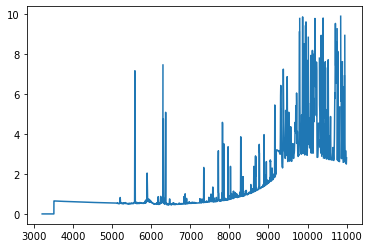

In [133]:
plt.plot(*skyOG.T)

In [134]:
skyyy

array([[3.2000e+03, 3.4999e+03, 3.5017e+03, ..., 1.0990e+04, 1.0995e+04,
        1.1000e+04],
       [0.0000e+00, 0.0000e+00, 6.5060e-01, ..., 2.5256e+00, 2.5006e+00,
        2.8139e+00]])

In [128]:
skyyy = skyOG.T

In [130]:
np.save("/home/swei20/PIML_v1/test/testdata/sky.npy", skyyy)

In [131]:
np.load("/home/swei20/PIML_v1/test/testdata/sky.npy")

array([[3.2000e+03, 3.4999e+03, 3.5017e+03, ..., 1.0990e+04, 1.0995e+04,
        1.1000e+04],
       [0.0000e+00, 0.0000e+00, 6.5060e-01, ..., 2.5256e+00, 2.5006e+00,
        2.8139e+00]])

In [187]:
skyyy

array([[3.2000e+03, 3.4999e+03, 3.5017e+03, ..., 1.0990e+04, 1.0995e+04,
        1.1000e+04],
       [0.0000e+00, 0.0000e+00, 6.5060e-01, ..., 2.5256e+00, 2.5006e+00,
        2.8139e+00]])

In [146]:
a = []
b = [1,2,3]
for i in range(4):
    a.append(b)

In [149]:
np.mean(a, axis=0)

array([1., 2., 3.])

In [151]:
import numpy as np
from abc import ABC, abstractmethod

class BaseObs(ABC):
    @abstractmethod
    def simulate_sigma():
        pass
    @abstractmethod
    def simulate():
        pass

class Obs(BaseObs):
    @staticmethod
    def get_var(flux, sky):
        #--------------------------------------------
        # Get the total variance
        # BETA is the scaling for the sky
        # VREAD is the variance of the white noise
        # This variance is still scaled with an additional
        # factor when we simuate an observation.
        #--------------------------------------------
        assert flux.shape[-1] == sky.shape[0]
        BETA  = 10.0
        VREAD = 16000
        return  flux + BETA*sky + VREAD

    @staticmethod
    def get_noise(sigma):
        return np.random.normal(0, sigma, np.shape(sigma))

    @staticmethod
    def get_snr(obsfluxs, sigma, noise_level=1):
        return np.mean(np.divide(obsfluxs, noise_level*sigma))

    @staticmethod
    def simulate(flux, sky):
        sigma = Obs.simulate_sigma(flux, sky)
        noise = Obs.get_noise(sigma)
        return noise + flux

    @staticmethod
    def simulate_sigma(flux, sky):
        var = Obs.get_var(flux, sky)
        sigma = np.sqrt(var)
        return sigma




In [154]:
class PfsObs(Obs):
    def set_sky(self, sky):
        self.sky = sky 

    def simulate_sigma(self, flux):
        var = Obs.get_var(flux, self.sky)
        return np.sqrt(var)

    def simulate(self, flux):
        sigma = self.simulate_sigma(flux)
        noise = self.get_noise(sigma)
        return noise + flux


class LowResObs(PfsObs):
    def __init__(self, step):
        self.step = step

    def simulate_sigma(self, fluxL):
        print("pig")
        var = super().get_var(fluxL, self.sky)
        var /= self.step
        print("merp")
        return np.sqrt(var)

In [155]:
aa = LowResObs(10)

In [156]:
aa.set_sky(np.arange(10))

In [157]:
aa.simulate(np.arange(10))

pig
merp


array([  3.43073355,  79.54451267, -18.69816438, -10.57673517,
       -68.85332174, -48.6664804 , 151.07252497, -29.02140664,
        33.94896389, -10.91834083])

In [158]:
bb = PfsObs()

In [159]:
bb.set_sky(np.arange(10))
bb.simulate(np.arange(10))

array([  55.4480385 ,   72.47978075,  -59.88544649,    7.77070687,
        -22.23974588,  -58.96042974,   59.68675656,  233.18116134,
        -21.8209925 , -163.8222722 ])

In [185]:
flux = np.tile(np.arange(10) + 10, (2,1))
sky = np.arange(10) +1
BETA  = 10.0
VREAD = 16000
var=flux + BETA*sky + VREAD

In [186]:
var

array([[16020., 16031., 16042., 16053., 16064., 16075., 16086., 16097.,
        16108., 16119.],
       [16020., 16031., 16042., 16053., 16064., 16075., 16086., 16097.,
        16108., 16119.]])

In [184]:
flux

array([12, 13, 14, 15, 16, 17, 18, 19])

In [180]:
var

array([16020., 16031., 16042., 16053., 16064., 16075., 16086., 16097.,
       16108., 16119.])

In [182]:
np.sqrt(var).round()

array([127., 127., 127., 127., 127., 127., 127., 127., 127., 127.])

In [166]:
np.random.seed(922)
sigma = np.arange(1,10)
noise = np.random.normal(0, sigma, np.shape(sigma)).round(2)

In [167]:
noise

array([ -1.38,  -1.89,   0.15,   3.78,  -2.98, -10.87,  -4.89,  -4.96,
        -1.74])

In [168]:
sigma

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [165]:
sigma

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [171]:
obsfluxs = noise+sigma

In [176]:
noise_level=10

In [177]:
np.mean(np.divide(obsfluxs, noise_level*sigma)).round(2)

0.04

In [178]:
var

NameError: name 'var' is not defined

In [ ]:
noise+sigma / sigma

In [160]:
        flux = np.arange(10) + 10
        sky = np.arange(10) +1
        obs = Obs()
        obs.get_var(flux, sky)

array([16020., 16031., 16042., 16053., 16064., 16075., 16086., 16097.,
       16108., 16119.])

In [47]:
class NNEval():
    def __init__(self, *args, **kwargs):
        self.model = None
        self.score = None
    

In [45]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02462637796998024
Test accuracy: 0.9914000034332275


In [137]:
import scipy as sp


In [196]:
def integrate_sky(sky):   
    intergrated = np.cumsum(sky[1])
    f = sp.interpolate.interp1d(sky[0], intergrated, fill_value=0)
    return f

In [197]:
fn = integrate_sky(skyyy)

In [198]:
skyyy[0]

array([ 3200. ,  3499.9,  3501.7, ..., 10990. , 10995. , 11000. ])

In [190]:
waveH

NameError: name 'waveH' is not defined

In [195]:
integraded_sky = fn(wave)
sky_grid = np.diff(integraded_sky)
sky_grid = np.insert(sky_grid, 0, integraded_sky[0])

ValueError: A value in x_new is below the interpolation range.

In [ ]:
b.Obs.sk

In [ ]:
import scipy as sp

In [191]:
from PIML.box.boxWR import BoxWR

ModuleNotFoundError: No module named 'PIML'

In [144]:
b = BoxWR()

NameError: name 'BoxWR' is not defined

In [145]:
W="RedM"; R="R"; Res=5000;step=10;
b.init(W,R, Res,step, onPCA=1, topk=10)

AttributeError: 'list' object has no attribute 'init'

In [192]:
wave = np.load("/home/swei20/PIML_v1/test/testdata/wave.npy")

In [194]:

wave.shape

(15404,)